# Bank Marketing

# problem statements-Predict Term Deposit Subscription.

TERM DEPOSIT-A term deposit is a deposit that a bank or financial institution offers with a fixed rate(offers better than just opening deposit account) in which your money will be return back at a specific maturity time.

In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


# READ THE FILE.

In [2]:
bk=pd.read_csv(r"C:\Users\Admin\Desktop\project file\Bank_Marketing\bank.csv")
bk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
bk.shape

(11162, 17)

In [4]:
bk.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [5]:
bk.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

# CHECK THE MISSING VALUES

In [6]:
bk.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No any missing value.

# convert categorical columns to numerical columns

In [7]:
bk.job=le.fit_transform(bk.job)
bk.marital=le.fit_transform(bk.marital)
bk.education=le.fit_transform(bk.education)
bk.default=le.fit_transform(bk.default)
bk.housing=le.fit_transform(bk.housing)
bk.loan=le.fit_transform(bk.loan)
bk.contact=le.fit_transform(bk.contact)
bk.month=le.fit_transform(bk.month)
bk.poutcome=le.fit_transform(bk.poutcome)
bk.deposit=le.fit_transform(bk.deposit)


In [8]:
bk.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
deposit      int32
dtype: object

# EDA(Exploratory Data Analysis)

#Corelation Plot

In [9]:
bk1=bk.corr()
bk1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


#Boxplot

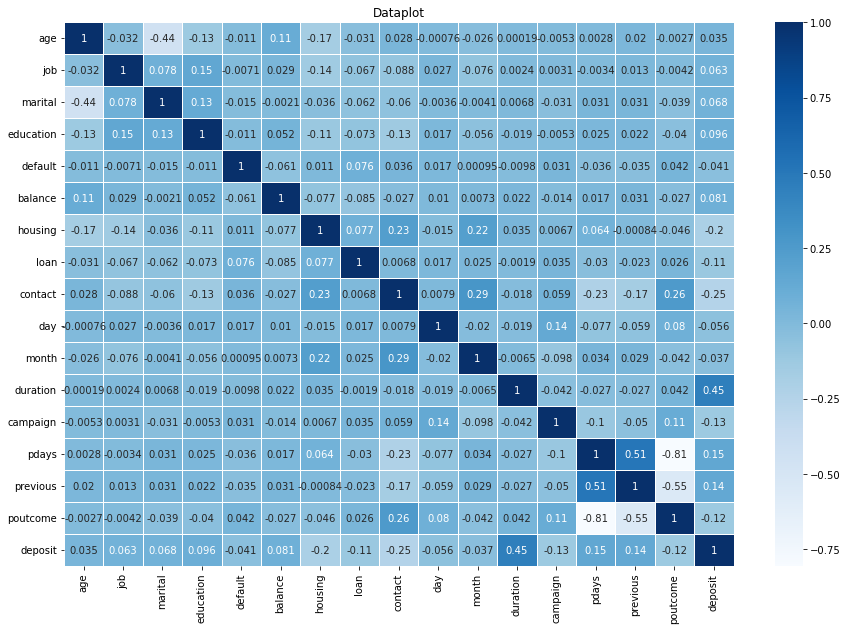

In [10]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(bk1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Dataplot")
plt.show()

# OUTLIER TREATMENT

<AxesSubplot:>

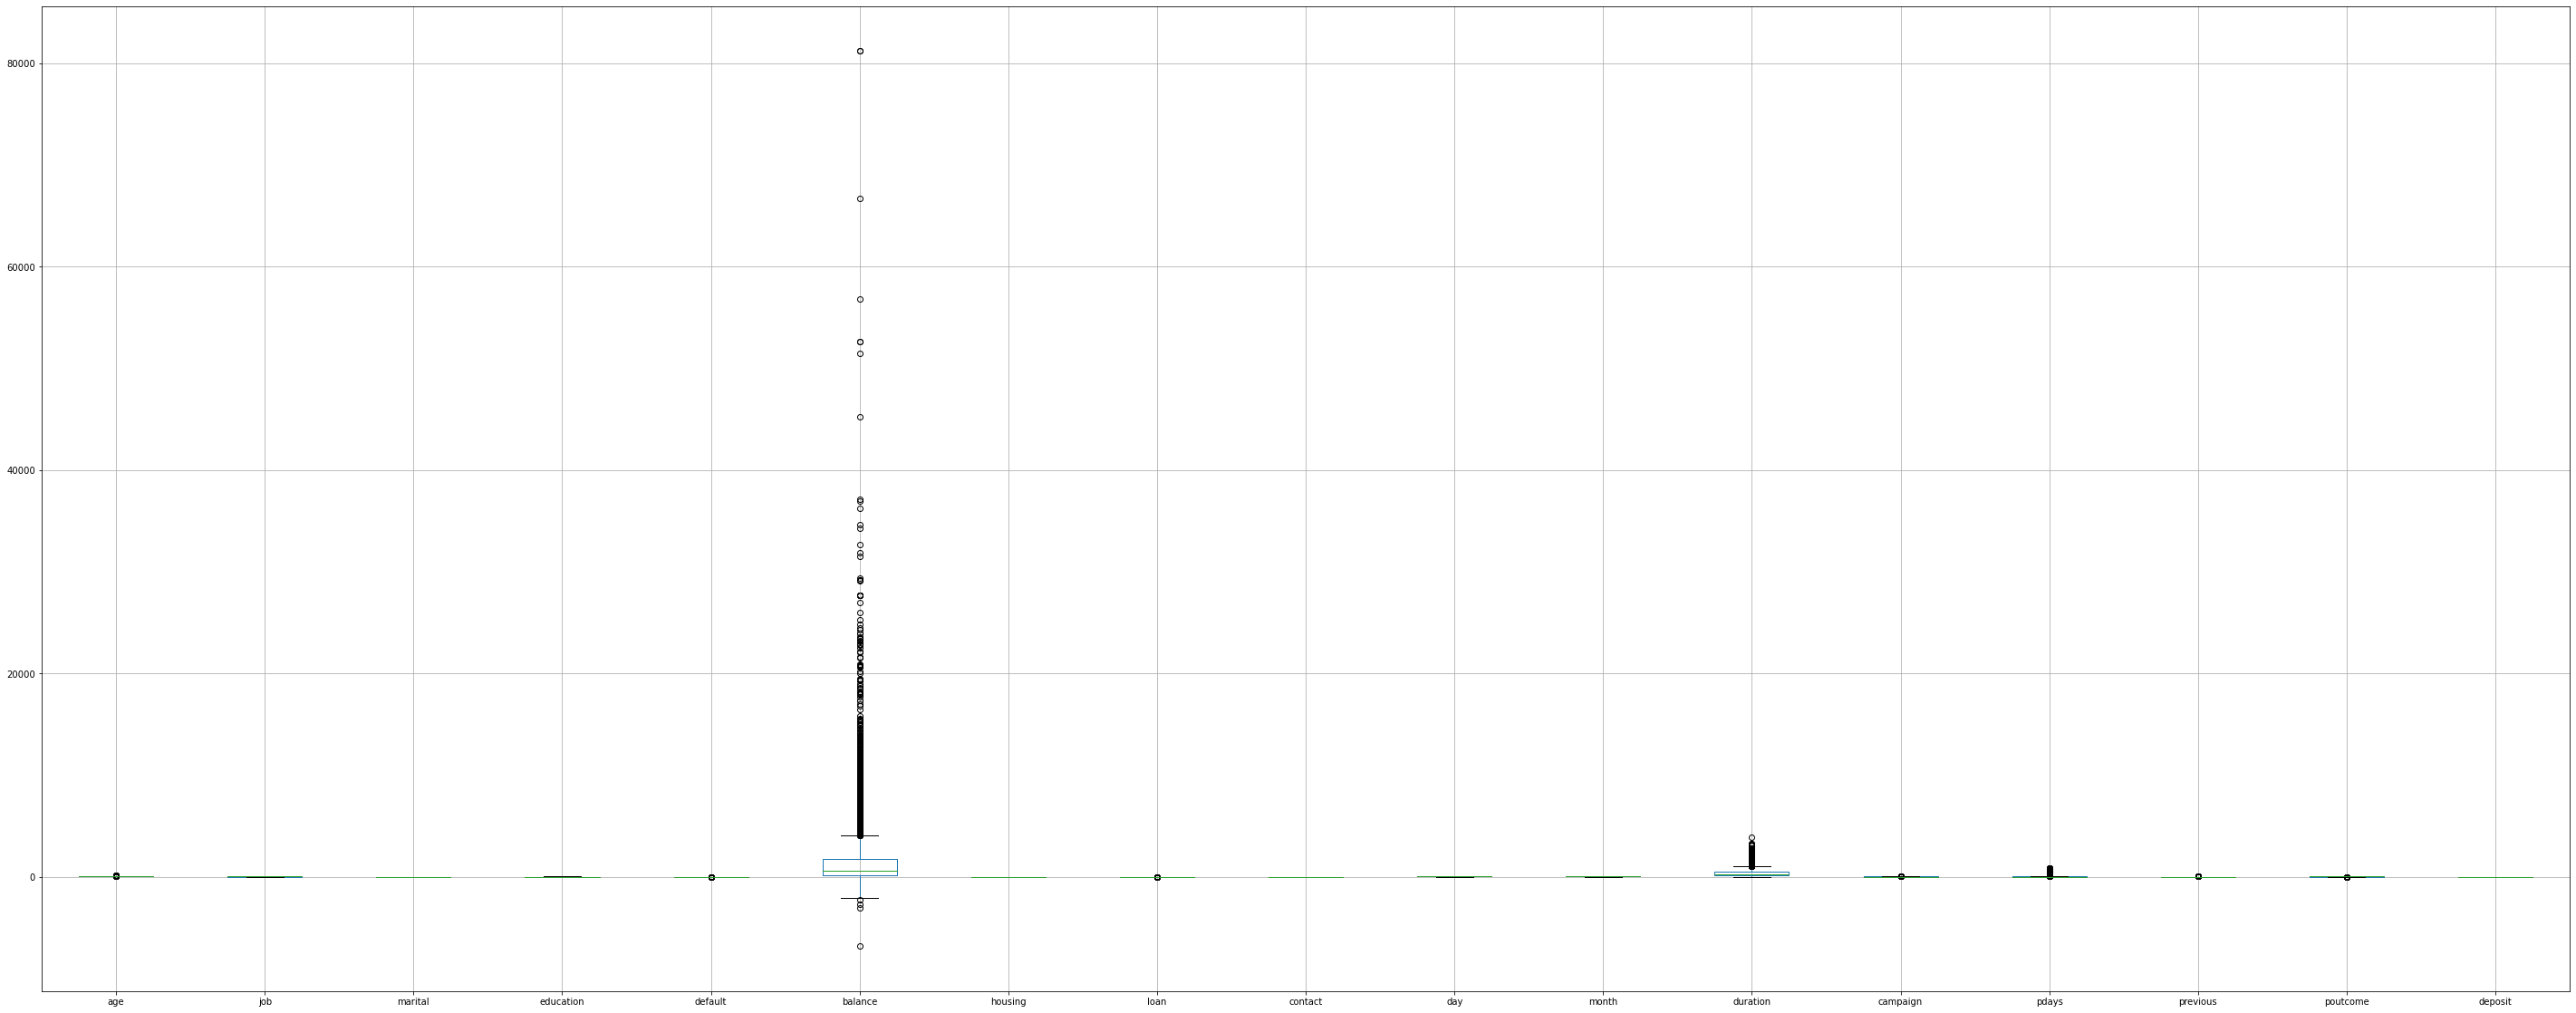

In [11]:
bk.boxplot(figsize=(50,20))

age,default,balance,loan,duration,compaign,pdays,previous,poutcome.This columns having outliers.

<AxesSubplot:>

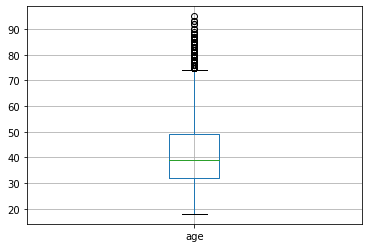

In [12]:
bk.boxplot(column="age")

<AxesSubplot:>

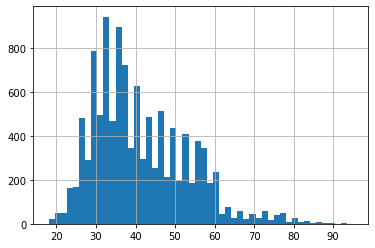

In [13]:
bk.age.hist(bins=50)

In [14]:
bk.age

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

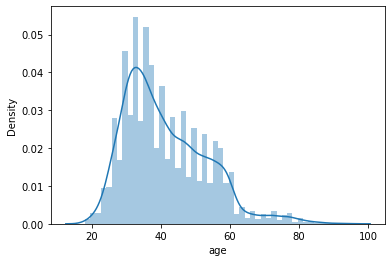

In [15]:
sns.distplot(bk["age"])

In [16]:
bk.age.describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [17]:
bk.age

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

In [18]:
iq1=bk.age.quantile(0.75)-bk.age.quantile(0.25)
iq1

17.0

In [19]:
u1=bk["age"].quantile(0.75)+3*iq1
l1=bk["age"].quantile(0.25)-3*iq1
print(u1,l1)

100.0 -19.0


In [20]:
bk.loc[bk["age"]>100.0,"age"]=100.0

<AxesSubplot:>

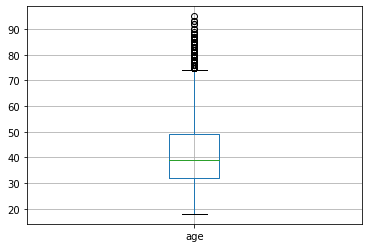

In [21]:
bk.boxplot(column="age")

<AxesSubplot:>

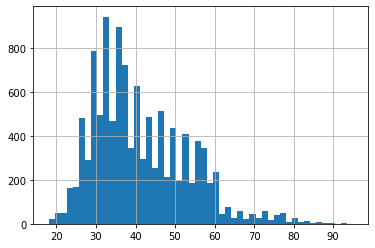

In [22]:
bk.age.hist(bins=50)

<AxesSubplot:xlabel='age', ylabel='Density'>

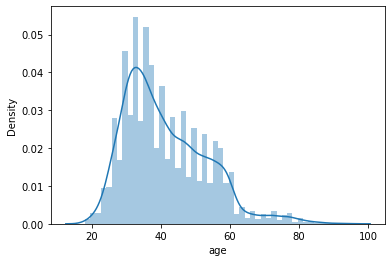

In [23]:
sns.distplot(bk["age"])

<AxesSubplot:>

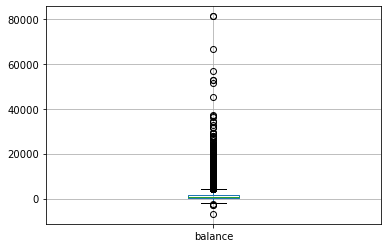

In [24]:
bk.boxplot(column="balance")

In [25]:
bk.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

<AxesSubplot:>

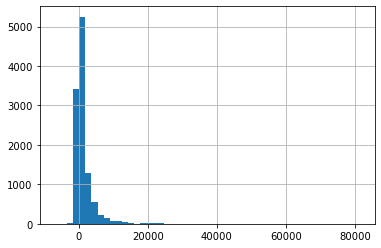

In [26]:
bk.balance.hist(bins=50)

In [27]:
bk.balance

0        2343
1          45
2        1270
3        2476
4         184
         ... 
11157       1
11158     733
11159      29
11160       0
11161       0
Name: balance, Length: 11162, dtype: int64

In [28]:
iq3=bk.balance.quantile(0.75)-bk.balance.quantile(0.25)
iq3

1586.0

In [29]:
u3=bk["default"].quantile(0.75)+3*iq3
l3=bk["default"].quantile(0.25)-3*iq3
print(u3,l3)

4758.0 -4758.0


In [30]:
bk.loc[bk["balance"]>4758,"balance"]=4758

<AxesSubplot:>

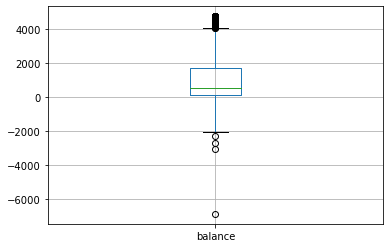

In [31]:
bk.boxplot(column="balance")

<AxesSubplot:>

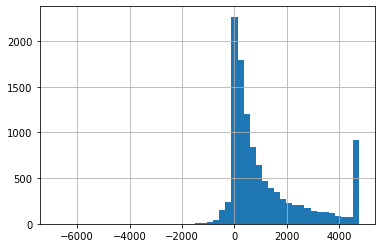

In [32]:
bk.balance.hist(bins=50)

<AxesSubplot:xlabel='balance', ylabel='Density'>

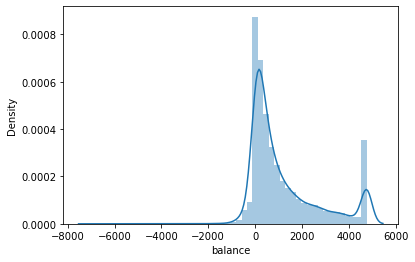

In [33]:
sns.distplot(bk["balance"])

<AxesSubplot:>

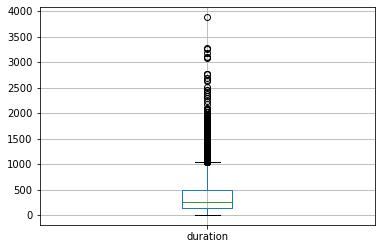

In [34]:
bk.boxplot(column="duration")

In [35]:
bk.duration.describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

<AxesSubplot:>

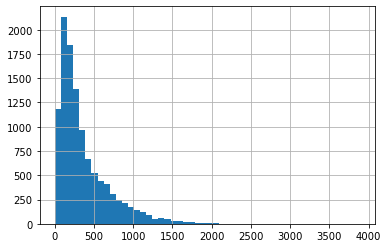

In [36]:
bk.duration.hist(bins=50)

In [37]:
bk.duration

0        1042
1        1467
2        1389
3         579
4         673
         ... 
11157     257
11158      83
11159     156
11160       9
11161     628
Name: duration, Length: 11162, dtype: int64

In [38]:
iq5=bk.duration.quantile(0.75)-bk.duration.quantile(0.25)
iq5

358.0

In [39]:
u5=bk["duration"].quantile(0.75)+3*iq5
l5=bk["duration"].quantile(0.25)-3*iq5
print(u5,l5)

1570.0 -936.0


In [40]:
bk.loc[bk["duration"]>1570,"duration"]=1570

<AxesSubplot:>

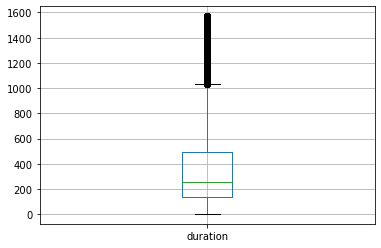

In [41]:
bk.boxplot(column="duration")

<AxesSubplot:>

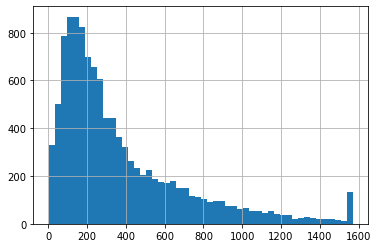

In [42]:
bk.duration.hist(bins=50)

<AxesSubplot:xlabel='duration', ylabel='Density'>

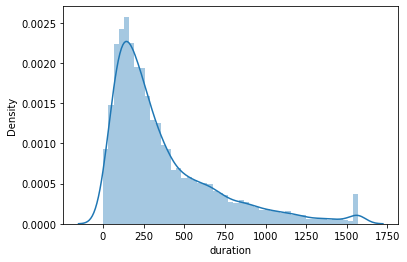

In [43]:
sns.distplot(bk["duration"])

<AxesSubplot:>

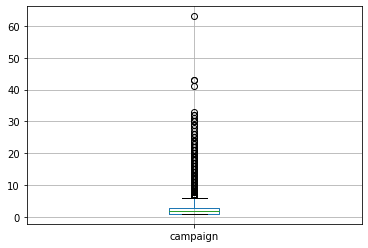

In [44]:
bk.boxplot(column="campaign")

In [45]:
bk.campaign.describe()

count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

<AxesSubplot:>

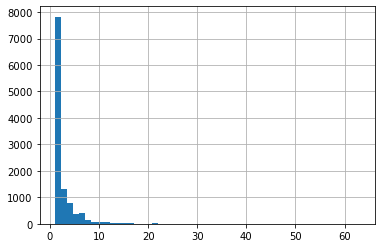

In [46]:
bk.campaign.hist(bins=50)

In [47]:
bk.campaign

0        1
1        1
2        1
3        1
4        2
        ..
11157    1
11158    4
11159    2
11160    2
11161    1
Name: campaign, Length: 11162, dtype: int64

In [48]:
iq6=bk.campaign.quantile(0.75)-bk.campaign.quantile(0.25)
iq6

2.0

In [49]:
u6=bk["campaign"].quantile(0.75)+3*iq6
l6=bk["campaign"].quantile(0.25)-3*iq6
print(u6,l6)

9.0 -5.0


In [50]:
bk.loc[bk["campaign"]>9.0,"campaign"]=9.0

<AxesSubplot:>

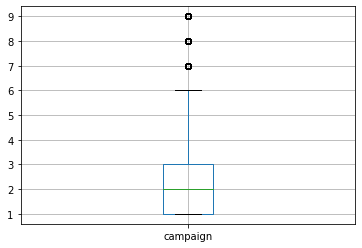

In [51]:
bk.boxplot(column="campaign")

<AxesSubplot:>

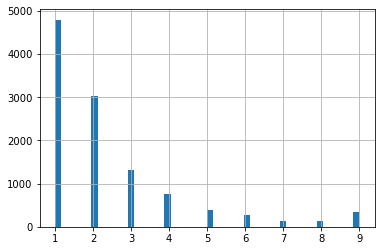

In [52]:
bk.campaign.hist(bins=50)

<AxesSubplot:xlabel='campaign', ylabel='Density'>

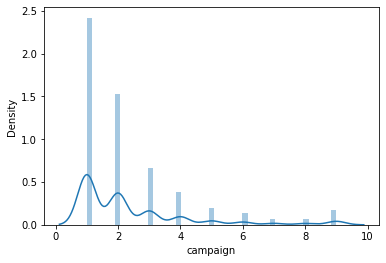

In [53]:
sns.distplot(bk["campaign"])

<AxesSubplot:>

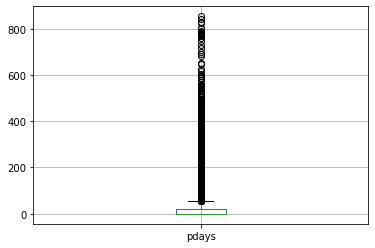

In [54]:
bk.boxplot(column="pdays")

In [55]:
bk.pdays.describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

<AxesSubplot:>

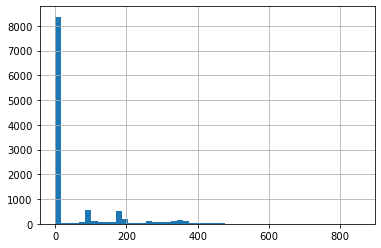

In [56]:
bk.pdays.hist(bins=50)

In [57]:
bk.pdays

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
11157     -1
11158     -1
11159     -1
11160    172
11161     -1
Name: pdays, Length: 11162, dtype: int64

In [58]:
iq7=bk.pdays.quantile(0.75)-bk.pdays.quantile(0.25)
iq7

21.75

In [59]:
u7=bk["campaign"].quantile(0.75)+3*iq7
l7=bk["campaign"].quantile(0.25)-3*iq7
print(u7,l7)

68.25 -64.25


In [60]:
bk.loc[bk["pdays"]>68.25,"pdays"]=68.25

<AxesSubplot:>

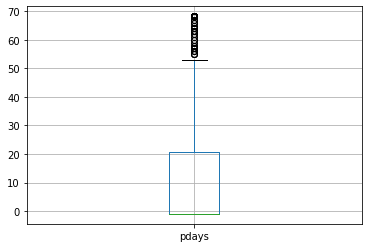

In [61]:
bk.boxplot(column="pdays")

<AxesSubplot:>

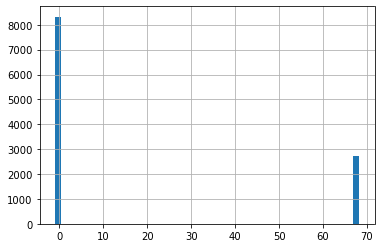

In [62]:
bk.pdays.hist(bins=50)

<AxesSubplot:xlabel='pdays', ylabel='Density'>

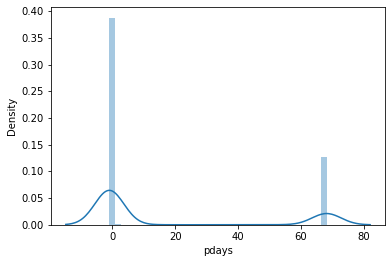

In [63]:
sns.distplot(bk["pdays"])

<AxesSubplot:>

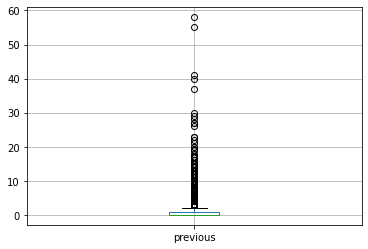

In [64]:
bk.boxplot(column="previous")

In [65]:
bk.previous.describe()

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

<AxesSubplot:>

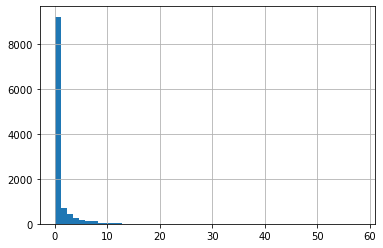

In [66]:
bk.previous.hist(bins=50)

In [67]:
bk.previous

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    5
11161    0
Name: previous, Length: 11162, dtype: int64

In [68]:
iq8=bk.previous.quantile(0.75)-bk.previous.quantile(0.25)
iq8

1.0

In [69]:
u8=bk["previous"].quantile(0.75)+3*iq8
l8=bk["previous"].quantile(0.25)-3*iq8
print(u8,l8)

4.0 -3.0


In [70]:
bk.loc[bk["previous"]>4.0,"previous"]=4.0

<AxesSubplot:>

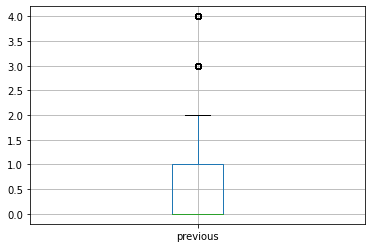

In [71]:
bk.boxplot(column="previous")

<AxesSubplot:>

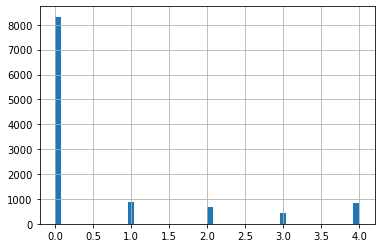

In [72]:
bk.previous.hist(bins=50)

<AxesSubplot:xlabel='previous', ylabel='Density'>

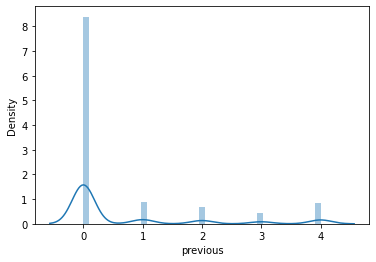

In [73]:
sns.distplot(bk["previous"])

Outlier treatment use for only numeric columns:age,balance,duration,compaign,pdays,previous.
we treated the outliers with the help of IQR method.

# DATA SAMPLING- MODEL BUILD ON DATA

In [74]:
bk_x=bk.iloc[:,0:-1]
bk_y=bk.iloc[:,-1]

In [75]:
bk_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1.0,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1.0,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1.0,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1.0,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1.0,0,3


In [76]:
#bk_y.head()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
cx_train,cx_test,cy_train,cy_test=train_test_split(bk_x,bk_y,test_size=0.2,random_state=101)

In [79]:
cx_train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3593,63,5,0,1,0,1490,0,0,0,8,6,506,1,-1.00,0,3
5474,31,1,2,1,0,573,1,0,1,5,3,58,1,68.25,2,0


In [80]:
cx_train.shape,cx_test.shape,cy_train.shape,cy_test.shape

((8929, 16), (2233, 16), (8929,), (2233,))

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [82]:
cx_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3593,63,5,0,1,0,1490,0,0,0,8,6,506,1,-1.00,0,3
5474,31,1,2,1,0,573,1,0,1,5,3,58,1,68.25,2,0
3731,22,8,2,0,0,423,0,0,0,16,5,316,1,68.25,4,2
8645,38,7,1,2,0,563,1,0,0,7,8,251,2,-1.00,0,3
3034,31,9,1,2,0,3338,1,0,0,21,2,264,2,-1.00,0,3


In [83]:
lm.fit(cx_train,cy_train)

LogisticRegression()

In [84]:
logR_pred=lm.predict(cx_test)
logR_pred

array([1, 0, 1, ..., 1, 1, 0])

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
m1=confusion_matrix(logR_pred,cy_test)
m1

array([[947, 272],
       [234, 780]], dtype=int64)

In [87]:
lm_acc=m1.diagonal().sum()/m1.sum()*100
lm_acc

77.33990147783251

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(logR_pred,cy_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1219
           1       0.74      0.77      0.76      1014

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



#Logistic Regression gives accuracy:77.33

# Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [91]:
cx_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3593,63,5,0,1,0,1490,0,0,0,8,6,506,1,-1.00,0,3
5474,31,1,2,1,0,573,1,0,1,5,3,58,1,68.25,2,0
3731,22,8,2,0,0,423,0,0,0,16,5,316,1,68.25,4,2
8645,38,7,1,2,0,563,1,0,0,7,8,251,2,-1.00,0,3
3034,31,9,1,2,0,3338,1,0,0,21,2,264,2,-1.00,0,3


In [92]:
dt.fit(cx_train,cy_train)

DecisionTreeClassifier()

In [93]:
dt_pred=dt.predict(cx_test)
dt_pred

array([1, 0, 1, ..., 1, 1, 1])

In [94]:
dt_df=pd.DataFrame({"Feature_importances":list(dt.feature_importances_),"column":list(bk.iloc[:,0:-1].columns)})


In [95]:
bk.iloc[:,0:-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1.00,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1.00,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1.00,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1.00,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1.00,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1.00,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1.00,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1.00,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,68.25,4,0


In [96]:
dt.feature_importances_

array([0.07341294, 0.03145432, 0.01257556, 0.01707811, 0.00056216,
       0.07362135, 0.03633942, 0.00730783, 0.04472356, 0.08731693,
       0.11264808, 0.34761319, 0.03001044, 0.07277303, 0.00809559,
       0.04446749])

In [97]:
m2=confusion_matrix(dt_pred,cy_test)
m2

array([[948, 241],
       [233, 811]], dtype=int64)

In [98]:
dt_acc=m2.diagonal().sum()/m2.sum()*100
dt_acc

78.7729511867443

In [99]:
print(classification_report(dt_pred,cy_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.77      0.78      0.77      1044

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



 Decision Tree gives accuracy:78.63

# Random Forest

In [100]:
#1.supervised learning technique.
#best suited for categorical data.
#is is black box algorithm.
#it is a ensembling technioque.
#combine the weak learners and give the powerfull model.
#it will take voting from each sample tree and give the final decision.
# we cant control the tree formation.--blackbox.

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [102]:
rf.fit(cx_train,cy_train)

RandomForestClassifier()

In [103]:
rf_pred=rf.predict(cx_test)
rf_pred

array([1, 0, 1, ..., 1, 1, 1])

In [104]:
m_1=confusion_matrix(rf_pred,cy_test)
m_1

array([[972, 116],
       [209, 936]], dtype=int64)

In [105]:
acc_rf=m_1.diagonal().sum()/m_1.sum()*100
acc_rf

85.44558889386475

In [106]:
print(classification_report(rf_pred,cy_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1088
           1       0.89      0.82      0.85      1145

    accuracy                           0.85      2233
   macro avg       0.86      0.86      0.85      2233
weighted avg       0.86      0.85      0.85      2233



# Boosting(Adaboost)

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [108]:
ad=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)

In [109]:
ad.fit(cx_train,cy_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5)

In [110]:
ad_pred=ad.predict(cx_test)

In [111]:
m3=confusion_matrix(ad_pred,cy_test)
m3

array([[978, 128],
       [203, 924]], dtype=int64)

In [112]:
acc_ab=m3.diagonal().sum()/m3.sum()*100
acc_ab

85.1768920734438

In [113]:
print(classification_report(ad_pred,cy_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1106
           1       0.88      0.82      0.85      1127

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



# XGBoost

In [114]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [115]:
xg.fit(cx_train,cy_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
xg_pred=xg.predict(cx_test)
xg_pred

array([1, 0, 1, ..., 1, 1, 1])

In [117]:
m4=confusion_matrix(xg_pred,cy_test)
m4

array([[996, 121],
       [185, 931]], dtype=int64)

In [118]:
acc_xg=m4.diagonal().sum()/m4.sum()*100
acc_xg

86.29646215853113

In [119]:
print(classification_report(xg_pred,cy_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1117
           1       0.88      0.83      0.86      1116

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



# KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=40)

In [121]:
kn.fit(cx_train,cy_train)

KNeighborsClassifier(n_neighbors=40)

In [122]:
kn_pred=kn.predict(cx_test)
kn_pred

array([1, 0, 1, ..., 1, 1, 1])

In [123]:
m5=confusion_matrix(kn_pred,cy_test)
m5

array([[927, 273],
       [254, 779]], dtype=int64)

In [124]:
acc_kn=m5.diagonal().sum()/m5.sum()*100
acc_kn

76.39946260635917

In [125]:
print(classification_report(kn_pred,cy_test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1200
           1       0.74      0.75      0.75      1033

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [126]:
l=list()

In [127]:
for i in range (1,100):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(cx_train,cy_train)
    kn_pred=kn.predict(cx_test)
    c=confusion_matrix(kn_pred,cy_test)
    acc=c.diagonal().sum()/c.sum()*100
    l.append(acc)

In [128]:
#l

In [129]:
import matplotlib.pyplot as plt

In [130]:
#p=plt.plot(l)

# Support Vector Machine

In [131]:
from sklearn.svm import SVC
svc=SVC()

In [132]:
svc.fit(cx_train,cy_train)

SVC()

In [133]:
svc_pred=svc.predict(cx_test)
svc_pred

array([1, 0, 1, ..., 1, 1, 1])

In [134]:
m6=confusion_matrix(svc_pred,cy_test)
m6

array([[955, 322],
       [226, 730]], dtype=int64)

In [135]:
acc_svc=m6.diagonal().sum()/m6.sum()*100
acc_svc

75.4590237348858

In [136]:
print(classification_report(svc_pred,cy_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1277
           1       0.69      0.76      0.73       956

    accuracy                           0.75      2233
   macro avg       0.75      0.76      0.75      2233
weighted avg       0.76      0.75      0.76      2233



# XGBoost are Best Suited Model.